### Bsc Computer Science 
### CM3005 Data Science 
### Multiple Linear Regression Analysis on Vehicle Dataset

### 1. Introduction 

In the vast landscape of automotive commerce, understanding the factors influencing the resale value of used cars is pivotal. With approximately 92 million cars produced in 2019, the demand for used cars has surged, leading to the emergence of a well-growing industry.

The project delves into the application of machine learning, particularly the use of the Linear Regression algorithm, to predict the price of used cars. 

Moreover, By employing advanced statistical and machine learning methodologies, our focus centers on unveiling meaningful patterns and correlations that contribute to an effective prediction model for the target variable, which is the selling price of the used cars.

The production boom in the car manufacturing industry, resulting in a vast number of used cars, necessitates accurate valuation methods. The project's focus on predicting the selling price aligns with the growing demand for reliable pricing information in the used car market.

This project contributes significantly to the used car market by introducing a machine learning-based approach to predict the resale value of cars. The model's ability to consider multiple features, including torque, mileage, and horsepower, offers a holistic and data-driven method for estimating a car's market price.

Sellers can make more informed decisions about pricing, and buyers can better understand the factors influencing the cost of a used car. Hence, The predictive model could serve as a valuable tool for assessing the worthiness of a used car based on its features, offering a more informed approach to buying and selling decisions.

### 2. Dataset Description

The dataset consists of 13 columns, each representing a specific attribute or characteristic of the listed used cars.

These attributes include:

<b>name:</b> The specific model or brand.

<b>year:</b> The year in which the car was purchased.

<b>selling_price:</b> The price at which the owner intends to sell the car.

<b>km_driven:</b> The distance covered by the car in kilometers.

<b>fuel:</b> The type of fuel the car utilizes.

<b>seller_type:</b> Whether the seller is a dealer or an individual.

<b>transmission:</b> Whether the car has a manual or automatic transmission.

<b>owner:</b> The number of previous owners.

<b>mileage:</b> The fuel efficiency or distance covered per unit of fuel. 

<b>engine:</b> The car's engine specifications.

<b>max_power:</b> The maximum power produced by the car's engine. 

<b>torque:</b> The rotational force produced by the engine.

<b>seats:</b> The seating capacity of the car. 

The dataset incorporates various data types, including numerical, categorical, and text-based information.

In terms of size, the dataset encompasses a significant number of entries, with each row representing a distinct used car listing. This large-scale dataset offers substantial potential for in-depth analysis and modeling.

### 3. Data Preparation

Data preparation aims to improve the quality and reliability of the data, making it ready for further exploration, analysis, or machine learning tasks.

It involves cleaning and transforming raw data into a format suitable for analysis and model training. This process is essential as real-world data is often messy, incomplete, or in a format that is not directly usable for analysis or modelling.

### 3.1 Importing Dependencies

In [1]:
# Data manipulation and analysis
import pandas as pd                # For data manipulation and analysis using DataFrames
import numpy as np                 # For numerical operations

# Data visualization
import matplotlib.pyplot as plt    # For creating static, interactive, and animated visualizations
import seaborn as sns              # For statistical data visualization based on matplotlib

# Statistical tests and transformations
from scipy.stats.mstats import normaltest   # For testing the normality of a sample distribution
from scipy.stats import boxcox             # For Box-Cox power transformation

# Statistical measures and preprocessing for regression
from scipy.stats import skew                    # For calculating the skewness of a dataset
from sklearn.preprocessing import LabelEncoder # For label encoding categorical variables

# Regression-related libraries
from sklearn.model_selection import train_test_split     # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler         # For standardizing feature values
from sklearn.linear_model import LinearRegression        # For implementing linear regression models
from sklearn.model_selection import cross_val_score       # For cross-validation of regression models
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error  # Regression evaluation metrics
from sklearn.model_selection import GridSearchCV          # For hyperparameter tuning using grid search
from sklearn.preprocessing import PolynomialFeatures     # For generating polynomial features

# Column transformation and preprocessing pipelines
from sklearn.compose import ColumnTransformer   # For applying different transformations to different columns
from sklearn.pipeline import Pipeline           # For constructing a pipeline of data transformations
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # For standardization and one-hot encoding

# Warning control
import warnings
warnings.filterwarnings('ignore')    # To suppress warnings during code execution

### 3.2 Importing Raw Data

In [2]:
# Load the raw dataset
rawData = pd.read_csv('carDetails.csv')

We have loaded the CSV file and we can now perform preliminary exploration so as to understand the structure and characteristics of the dataset.

### 3.3 Exploring Raw Data

In [3]:
# Display the dataset
rawData.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
# Get information about the dataset
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


The data comprises of 8128 entries with 13 columns and there are mainly three types of data types - Integer ('int64'), Float('float64'), and Object('object').

We can also observe that all the features have 'non-null' entries except for 'mileage', 'engine', 'max_power', 'torque', and 'seats'. This suggests that there are some missing values in the vehicle dataset. 

In [5]:
# Generate descriptive statistics of the dataset
rawData.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


### 3.4 Data Cleaning and Preprocessing

### Handling Missing Values 

In [6]:
# Get information on Missing Values
rawData.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [7]:
# Identify missing values
rawData[rawData.isna().any(axis=1)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
78,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
87,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
119,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7846,Toyota Qualis Fleet A3,2000,200000,100000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
7996,Hyundai Santro LS zipPlus,2000,140000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
8009,Hyundai Santro Xing XS eRLX Euro III,2006,145000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
8068,Ford Figo Aspire Facelift,2017,580000,165000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN


In [8]:
# Drop rows with missing valuesb
rawData = rawData.dropna().reset_index(drop=True)

The above set of codes identifies rows with all the missing values. It can be observed that all the missing values are present in the same rows across multiple columns. 

Thus, these columns are dropped. 

### Handling Duplicate Values 

In [9]:
# Identify duplicates 
rawData.duplicated().sum()

# Drop rows with duplicate valeus 
rawData.drop_duplicates(inplace=True)

In [10]:
# Create a new DataFrame
data = rawData.copy()

# Get information on data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6717 entries, 0 to 7903
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   object 
 1   year           6717 non-null   int64  
 2   selling_price  6717 non-null   int64  
 3   km_driven      6717 non-null   int64  
 4   fuel           6717 non-null   object 
 5   seller_type    6717 non-null   object 
 6   transmission   6717 non-null   object 
 7   owner          6717 non-null   object 
 8   mileage        6717 non-null   object 
 9   engine         6717 non-null   object 
 10  max_power      6717 non-null   object 
 11  torque         6717 non-null   object 
 12  seats          6717 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 734.7+ KB


The above set of code identifies rows with duplicate values and drops the row. A new data frame is also created as a copy of the modified dataframe. 

The cleaned dataset now has 6717 entries with 13 columns. Non-null counts have also been checked, confirming no missing values. 

### Handling Inconsistent Values 

In [11]:
# Extracts numeric values and converts them to float data type
data['max_power'] = data['max_power'].str.extract(r'(\d+\.*\d*)').astype(float)

# Extracts numeric values and converts them to float data type
data['mileage'] = data['mileage'].str.extract(r'(\d+\.*\d*)').astype(float)

# Extracts numeric values and converts them to float data type
data['engine'] = data['engine'].str.extract(r'(\d+\.*\d*)').astype(float)

# splits the column into two columns ('torque' and 'rpm')
data[['torque', 'rpm']] = data['torque'].str.split('/|@|at', n=1, expand=True)

# Drops the 'rpm' column
data = data.drop('rpm', axis=1)

# Extracts numeric values and converts them to float data type
data['torque'] = data['torque'].str.extract(r'(\d+\.*\d*)').astype(float)

# Applies a conditional transformation to the 'torque' column. 
# If the torque value is less than or equal to 50, 
# it is multiplied by the gravitational constant (9.81), otherwise, it remains unchanged.
data['torque'] = data['torque'].apply(lambda x: 9.81*x if x <= 50 else x)

The vehicle dataset has columns, 'mileage', 'engine', 'max_power', and 'torque' that contains string characters.

The numeric values of the above mentioned columns are extracted and and are converted to float data types.

The 'torque' column is split into two columns - 'torque; and 'rpm'. Following that, the torque values are retained and converted to float.

The code also applies a conditional transformation to adjust torque values.

In [12]:
# Disply the dataset
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.000,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.000,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,124.587,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,219.744,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,112.815,5.0


### Handling Alphanumeric Characters 

In [13]:
# Computue number of unique values
data['name'].nunique()

1982

In [14]:
data['name'] = data['name'].str.extract(r'(\w+)')

# Compute number of unique values
data['name'].nunique()

31

The above set of code, cleans and transforms the 'name' column by removing special characters and retaining only the alphanumeric characters and underscores. 

### 4. Exploratory Data Analysis (EDA)

The primary goal of our EDA is to analyze and explore the data to gain insights, identify patterns, and formulate hypotheses.

Through descriptive statistics and visualization we can identify patterns, trends, and potential outliers, providing valuable insights into the relationships between variables.

In [15]:
# Select columns with the 'object' data type
obj_cols = data.select_dtypes(object).columns.values.tolist()

# Select columns with numeric data types (e.g., int64, float64)
num_cols = data.select_dtypes(np.number).columns.values.tolist()

The above code facilitates the separation of columns in our DataFrame based on their data types.

### Numerical Data Analysis

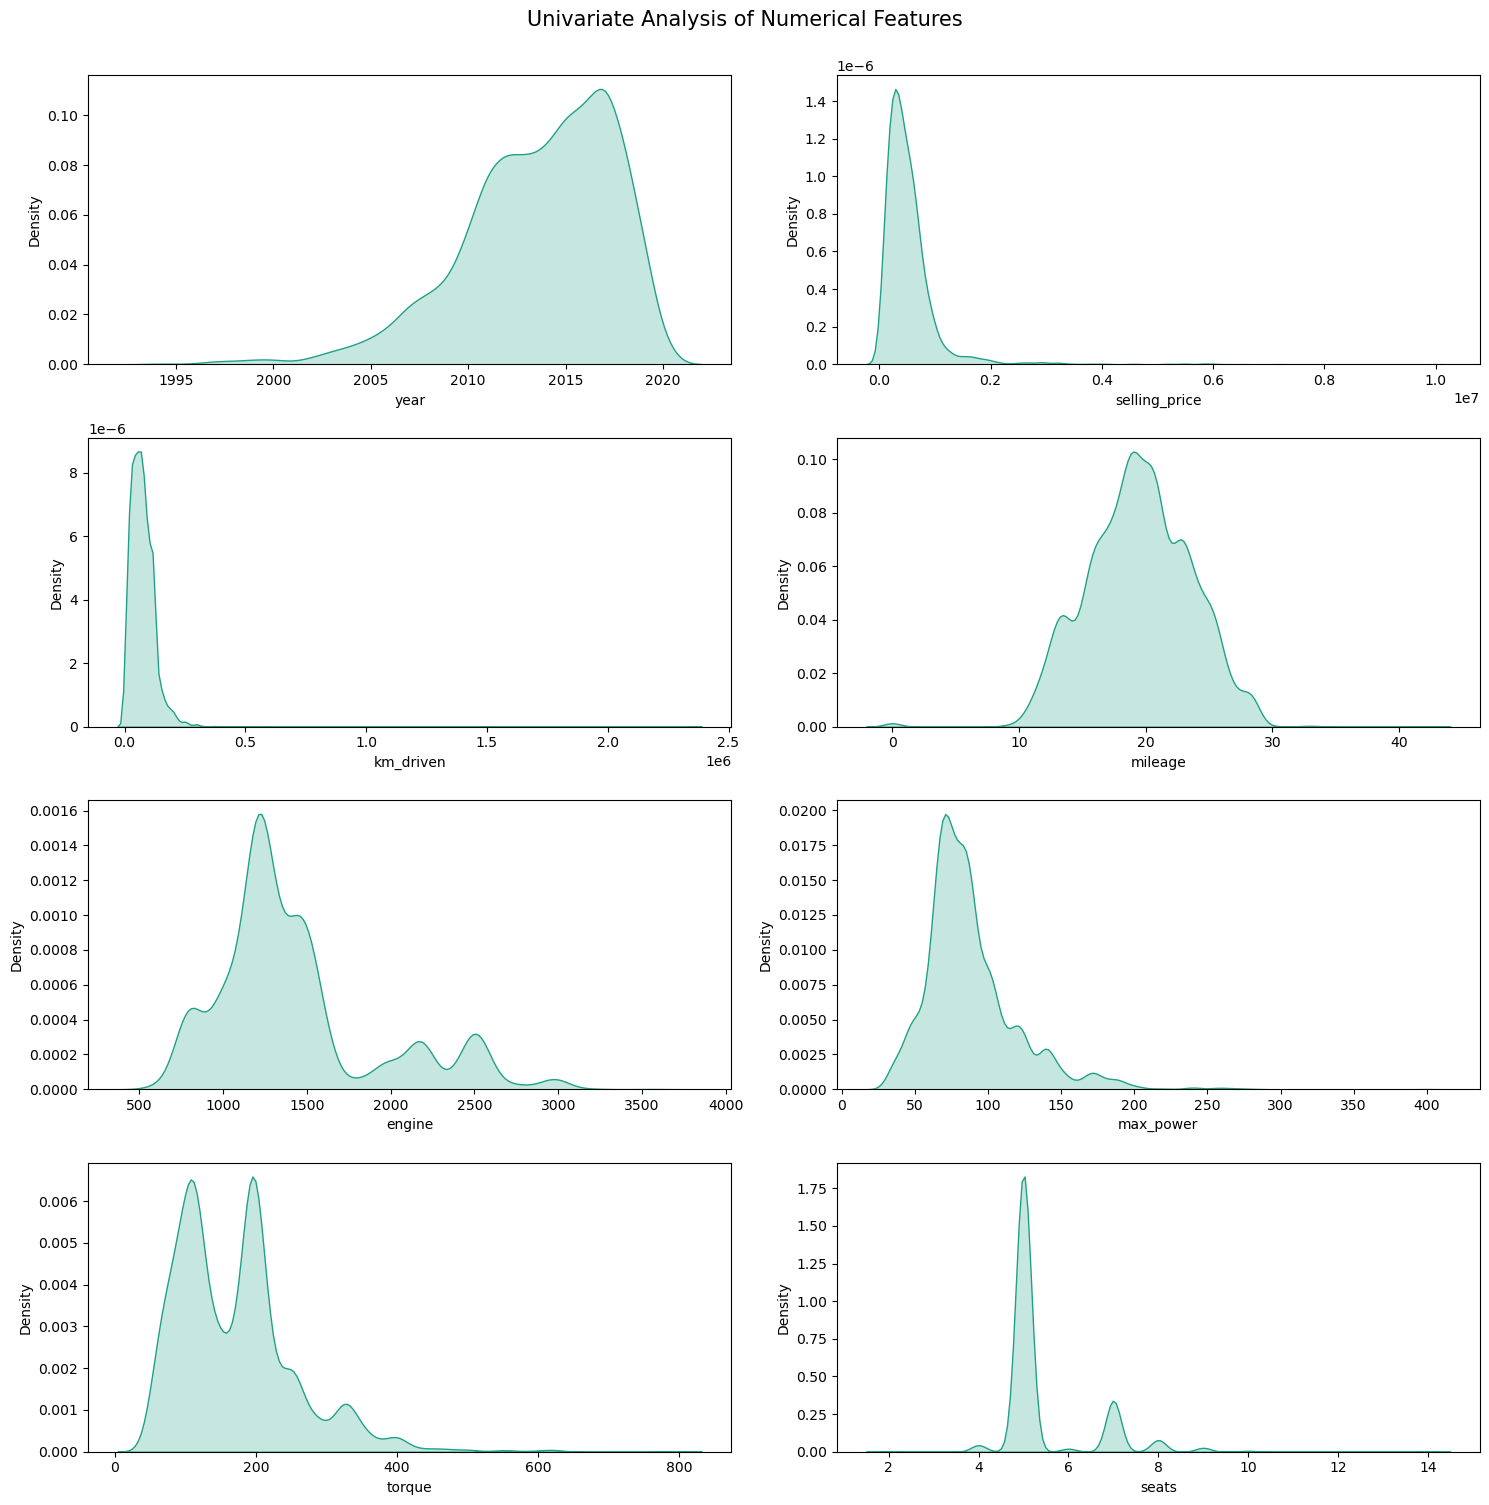

In [16]:
# Set the size of the entire figure
plt.figure(figsize=(15, 15))

# Add a title to the entire figure
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=15, y=1.)

# Loop through each numeric column for univariate analysis
for i in range(0, len(num_cols)):
    # Create subplots in a 4x2 grid
    plt.subplot(4, 2, i+1)
    
    # Plot the Kernel Density Estimate (KDE) for the current numeric column with 'viridis' color palette
    sns.kdeplot(x=data[num_cols[i]], shade=True, color=sns.color_palette('viridis')[3])
    
    # Set xlabel for the subplot
    plt.xlabel(num_cols[i])
    
    # Adjust layout for better spacing between subplots
    plt.tight_layout()

# Show the plot
plt.show()

The above univariate analysis, KDE plots, are used to estimate the probability density function of the data, giving insights into the data's distribution, central tendency, and spread.

Based on the above plots, we can observe skewness in some of the features. Hence, we will plot to check for skewness in our numerical features.

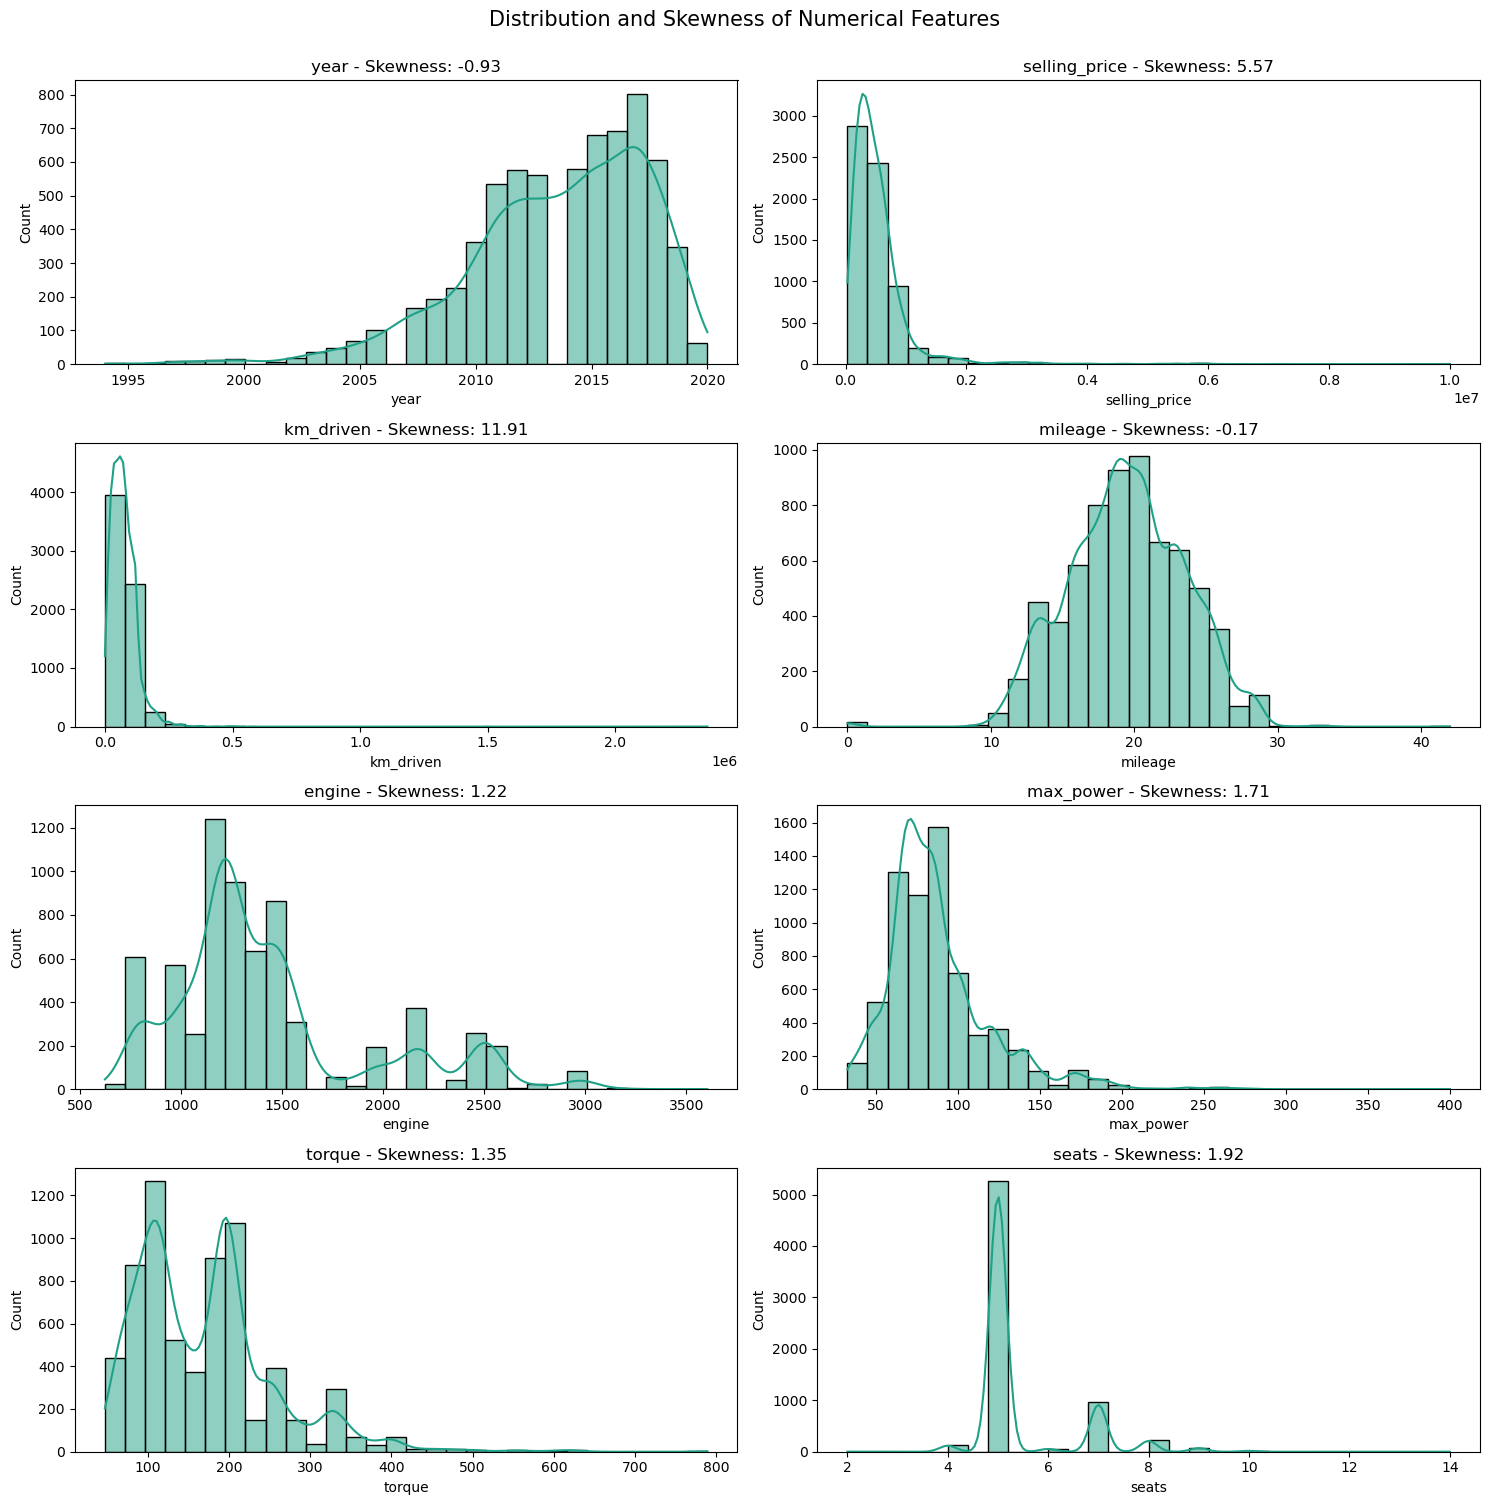

In [17]:
# Function to plot histograms with skewness lines
def plot_skewness(data, num_cols):
    # Set the size of the entire figure
    plt.figure(figsize=(15, 15))
    
    # Add a title to the entire figure
    plt.suptitle('Distribution and Skewness of Numerical Features', fontsize=15, y=1.)

    # Loop through each numeric column for plotting
    for i, col in enumerate(num_cols, 1):
        # Create subplots in a 4x2 grid
        plt.subplot(4, 2, i)
        
        # Plot a histogram with KDE for the current numeric column
        sns.histplot(data[col], kde=True, bins=30,color=sns.color_palette('viridis')[3])
        
        # Set the title for the subplot, including the skewness value
        plt.title(f'{col} - Skewness: {skew(data[col]):.2f}')

    # Adjust layout for better spacing between subplots
    plt.tight_layout()
    
    # Display the plot
    plt.show()

# Plotting
plot_skewness(data, num_cols)

The above plots shows the titles of the subplots which includes the name of the feature and its skewness value.

### Descriptive Statistics

Adding onto the above set of visualizaitons, we will calculate summary statistics (mean, median, standard deviation, etc.) to describe the central tendency and dispersion of the data.

We will also apply formating to the statstics table to ensure that the numbers are displayed without necessary trailing zeros, making the output more concise.

In [18]:
# Use the describe method to generate descriptive statistics for numeric columns
data[num_cols].describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats
count,6717,6717,6717,6717,6717,6717,6717,6717
mean,2013.61,526386,73398.3,19.4666,1430.99,87.7661,171.2,5.43427
std,3.8974,523550,58703.3,4.0481,493.469,31.7246,84.8025,0.983805
min,1994,29999,1,0,624,32.8,47.088,2
25%,2011,250000,38000,16.8,1197,67.1,110.853,5
50%,2014,420000,68203,19.44,1248,81.83,160,5
75%,2017,650000,100000,22.5,1498,100,200.124,5
max,2020,1e+07,2.36046e+06,42,3604,400,789,14


### 4.1 Analysing Dependent variable: 'selling_price'

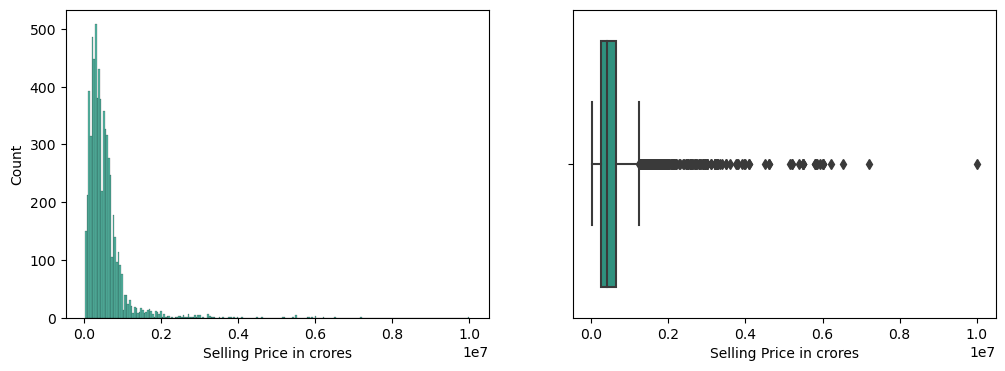

In [19]:
# Set the size of the entire figure
plt.figure(figsize=(12, 4))

# Subplot 1: Histogram of Selling Price
plt.subplot(1, 2, 1)

# Plot a histogram of the 'selling_price' variable
sns.histplot(data=data, x='selling_price', color=sns.color_palette('viridis')[3])

# Set xlabel for the subplot
plt.xlabel('Selling Price in crores')

# Subplot 2: Boxplot of Selling Price
plt.subplot(1, 2, 2)

# Plot a boxplot of the 'selling_price' variable
sns.boxplot(data=data, x='selling_price', color=sns.color_palette('viridis')[3])

# Set xlabel for the subplot
plt.xlabel('Selling Price in crores')

# Display the plots
plt.show()

The above is a side-by-side visualization consisting of a histogram and a boxplot for the 'selling_price' variable. 

The histogram shows the distribution of selling prices, while the boxplot provides information on the central tendency, spread, and the presence of outliers in the data.

In [20]:
# Calculate the 70th percentile of the 'selling_price' column
seventieth_percentile = data['selling_price'].quantile(0.70)

print('seventieth_percentile: ', seventieth_percentile)

seventieth_percentile:  600000.0


The seventieth percentile indicates that 70% of the selling prices are below  this value. This provides a specific threshold below in which a significant portion of the data falls.

In [21]:
# Print the mean of the 'selling_price' column rounded to 2 decimal places
print(f'Mean of selling price: {round(data["selling_price"].mean(), 2)}')

# Print the median of the 'selling_price' column rounded to 2 decimal places
print(f'Median of selling price: {round(data["selling_price"].median(), 2)}')

Mean of selling price: 526386.0
Median of selling price: 420000.0


The mean selling price is considerably higher than the median.

The dataset's maximum selling price is observed to be 7,200,000, emphasizing  right-skewed distribution with a majority of prices concentrated towards the lower end, but with some higher-priced outliers influencing the mean.

These outliers might represent premium or luxury vehicles that significantly impact the overall selling price range.

### Data Transformation 

Having performed Visual Inspection and Statistical Analysis on the 'selling_price' variable we can conclude that the distributions are not normal and hence we can consider data transformation to normalize the dataset.

We will perform different transformations on the 'selling_price' variable and visualise the density plots of the transformed data.

The intention is to explore how different transformations affect the distribution of the 'selling_price' variable and indentify a transformation that makes the data more appromimatey normally distributed.

The different transformations explored are:

1. Log Transformation
2. SQRT Transformation
3. Boxcox Transformation

In [22]:
# Extract selling prices that are greater than 0 (Box-Cox transformation requires positive values)
positive_selling_price = data[data['selling_price'] > 0]['selling_price']

# Perform Box-Cox transformation on the positive selling prices
boxcox_results = boxcox(positive_selling_price)

# Extract the transformed data and the lambda value used in the Box-Cox transformation
y_boxcox = boxcox_results[0]
y_lambda = boxcox_results[1]

Text(0.5, 1.0, 'Boxcox Tranformation')

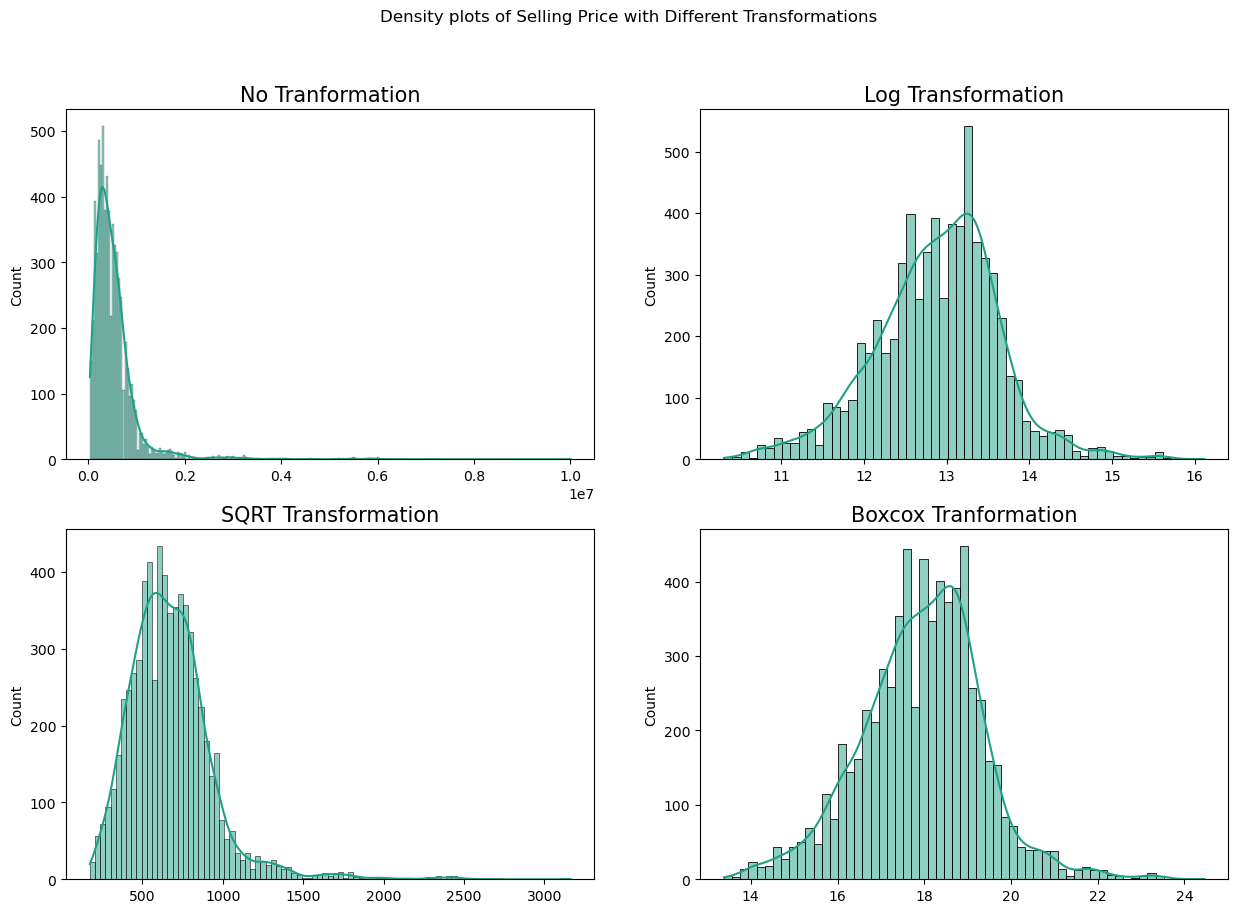

In [23]:
# Creating a 2x2 subplot grid for visualizing different transformations.
fig, axes = plt.subplots(2,2, figsize=(15, 10))
fig.suptitle('Density plots of Selling Price with Different Transformations')

# The first subplot (top-left) shows the density plot of the original 'selling_price' data without any transformation
sns.histplot(ax=axes[0,0], x=data['selling_price'], kde=True,color=sns.color_palette('viridis')[3]).set_xlabel(None)
axes[0,0].set_title('No Tranformation', fontsize=15)

# The second subplot (top-right) shows the density plot after applying a log transformation to the 'selling_price' data.
sns.histplot(ax=axes[0,1], x=np.log(data['selling_price']), kde=True, color=sns.color_palette('viridis')[3]).set_xlabel(None)
axes[0,1].set_title('Log Transformation', fontsize=15)

#The third subplot (bottom-left) shows the density plot after applying a square root (SQRT) transformation to the 'selling_price' data.
sns.histplot(ax=axes[1,0], x=np.sqrt(data['selling_price']), kde=True, color=sns.color_palette('viridis')[3]).set_xlabel(None)
axes[1,0].set_title('SQRT Transformation', fontsize=15)

# The fourth subplot (bottom-right) shows the density plot after applying the Box-Cox transformation to the 'selling_price' data.
sns.histplot(ax=axes[1,1], x=y_boxcox, kde=True, color=sns.color_palette('viridis')[3])
axes[1,1].set_title('Boxcox Tranformation', fontsize=15)

The above plots enable us to visually compare the density plots of the original 'selling_price' data and the data after applying different transformations.

Moreover, it can be concluded that Log Transformation performs better when compared to the the other transformations.

### Performing Log Transformation & Outlier Handling 

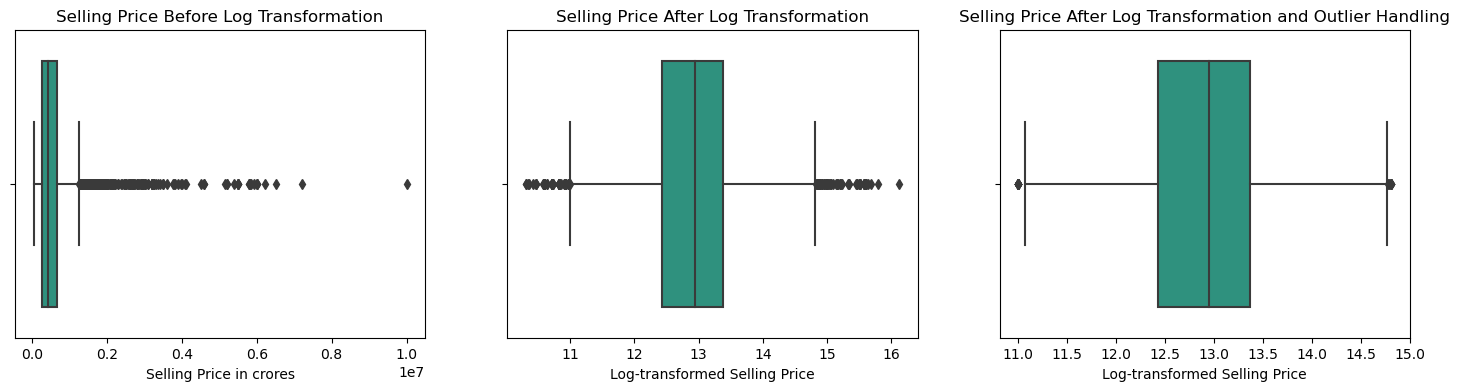

In [24]:
# Function to calculate lower and upper limits for outliers after log transformation
def log_lower_and_upper_limit(data, column):
    # Applying log transformation to the column
    log_values = np.log1p(data[column])
    
    # Calculating limits on log-transformed values
    q1 = log_values.quantile(0.25)
    q3 = log_values.quantile(0.75)
    iqr = q3 - q1
    
    return np.exp(q1 - 1.5 * iqr), np.exp(q3 + 1.5 * iqr)

# Function to remove outliers based on log-transformed limits
def log_removing_outliers(data, column):
    lower_limit, upper_limit = log_lower_and_upper_limit(data, column)
    
    # Applying log transformation to the column
    log_values = np.log1p(data[column])
    
    # Removing outliers based on log-transformed limits
    return data[(log_values >= np.log1p(lower_limit)) & (log_values <= np.log1p(upper_limit))]


# Choose a specific color from the 'viridis' palette
custom_color = sns.color_palette('viridis')[3]

# Box plots before and after log transformation and outlier handling
plt.figure(figsize=(18, 4))

# Subplot 1: Box plot before log transformation
plt.subplot(1, 3, 1)
sns.boxplot(data=data, x='selling_price', color=custom_color)
plt.title('Selling Price Before Log Transformation')
plt.xlabel('Selling Price in crores') 

# Log transformation and outlier handling
data['selling_price_log'] = np.log1p(data['selling_price'])

# Subplot 2: Box plot after log transformation
plt.subplot(1, 3, 2)
sns.boxplot(data=data, x='selling_price_log', color=custom_color)
plt.title('Selling Price After Log Transformation')
plt.xlabel('Log-transformed Selling Price') 

# Removing outliers and plotting the updated box plot
data = log_removing_outliers(data, 'selling_price')

# Subplot 3: Box plot after log transformation and outlier handling
plt.subplot(1, 3, 3)
sns.boxplot(data=data, x='selling_price_log', color=custom_color)
plt.title('Selling Price After Log Transformation and Outlier Handling')
plt.xlabel('Log-transformed Selling Price') 

plt.show()

The above code visualizes the impact of log transformation on the distribution of 'selling_price' and observes the effect of outlier handling using the calculated limits.

we have calculated the lower and upper limits for outliers after log transformation using the interquartile range (IQR) method and have removed the outliers based on the log-transformed limits.

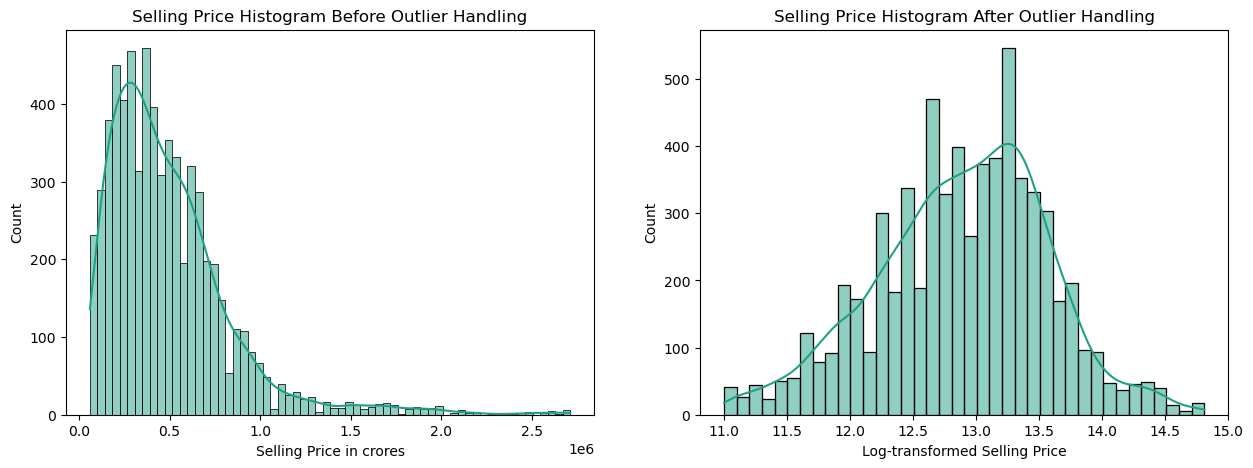

In [25]:
# Box plots before and after outlier handling
plt.figure(figsize=(15, 5))

# Subplot 1: Histogram before outlier handling
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='selling_price', kde=True, color=custom_color)
plt.title('Selling Price Histogram Before Outlier Handling')
plt.xlabel('Selling Price in crores') 

# Subplot 2: Histogram after outlier handling
plt.subplot(1, 2, 2)
sns.histplot(data=data, x='selling_price_log', kde=True, color=custom_color)
plt.title('Selling Price Histogram After Outlier Handling')
plt.xlabel('Log-transformed Selling Price') 

plt.show()

The left histogram shows the distribution of 'selling_price' before handling outliers, and the right histogram shows the distribution after applying a log transformation and handling outliers.

### 4.2 Analysing Independent Variable: 'km_driven'

In [26]:
# Descriptive statistics for the 'km_driven' column
data['km_driven'].describe()

count    6.566000e+03
mean     7.376546e+04
std      5.897443e+04
min      1.000000e+00
25%      3.900000e+04
50%      7.000000e+04
75%      1.000000e+05
max      2.360457e+06
Name: km_driven, dtype: float64

The 'km_driven' column has a range from 1 to 2,360,457 kilometers.

The data appears to be positively skewed, as the mean is greater than the median.

There is a significant difference between the maximum value and the values at the 75th percentile, suggesting the presence of potential outliers or extreme values.

It's worth noting that the maximum value of 2,360,457 kilometers seems unusually high compared to the rest of the data. Hence, we may have to investigate further. 

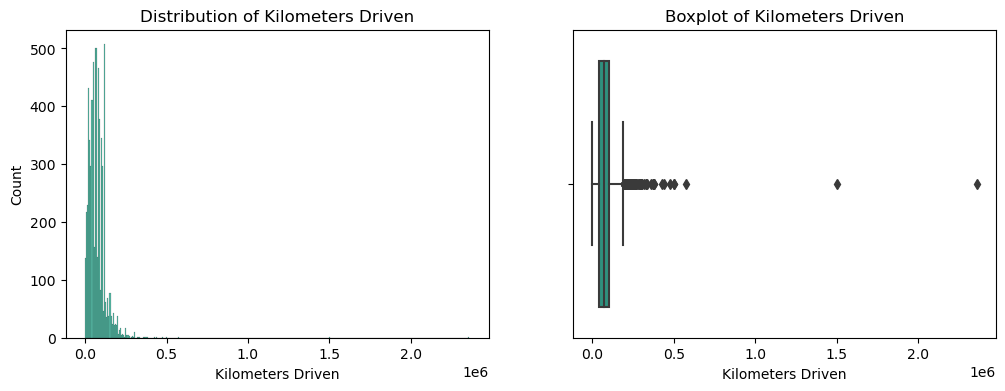

In [27]:
plt.figure(figsize=(12, 4))

# Subplot 1: Histogram of 'km_driven'
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='km_driven', color=custom_color)
plt.xlabel('Kilometers Driven')
plt.title('Distribution of Kilometers Driven')

# Subplot 2: Boxplot of 'km_driven'
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='km_driven', color=custom_color)
plt.xlabel('Kilometers Driven')
plt.title('Boxplot of Kilometers Driven')

plt.show()

The histogram provides insights into the frequency distribution of kilometers driven, while the boxplot provides information about central tendency, spread, and the presence of potential outliers.

### Outliers Handling 

In [28]:
def remove_outliers_iqr(data, column):
    # Calculate the first quartile (Q1) and third quartile (Q3)
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)

    # Calculate the IQR (Interquartile Range)
    iqr = q3 - q1

    # Define lower and upper limits to filter outliers
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr

    # Filter the data and keep only values within the specified range
    data_no_outliers = data[(data[column] >= lower_limit) & (data[column] <= upper_limit)]

    return data_no_outliers

The above code provides a reusable way to remove outliers from a specified column in a DataFrame using the IQR method. 

In [29]:
# Apply the function to remove outliers from the 'km_driven' column in the 'data' DataFrame
data = remove_outliers_iqr(data, 'km_driven')

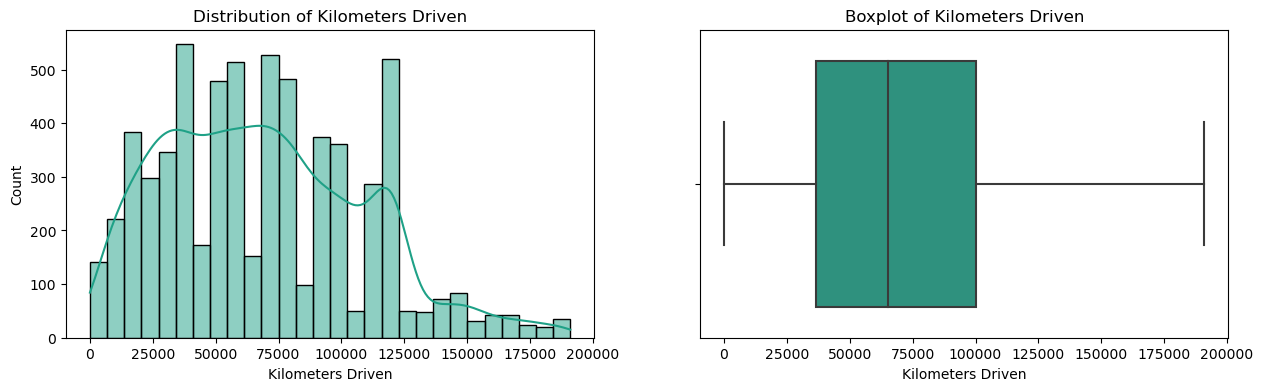

In [30]:
# Set the size of the figure for better visualization
plt.figure(figsize=(15, 4))

# Subplot 1: Histogram of 'km_driven' with KDE (Kernel Density Estimate)
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='km_driven', kde=True, color=custom_color )
plt.title('Distribution of Kilometers Driven')
plt.xlabel('Kilometers Driven')

# Subplot 2: Boxplot of 'km_driven'
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='km_driven', color=custom_color)
plt.title('Boxplot of Kilometers Driven')
plt.xlabel('Kilometers Driven')

# Display the plots
plt.show()

The above plots provide a visual comparison of how outlier removal have affected the distribution of the 'km_driven' variable.

### Analysing Relationship : 'selling_price' vs 'km_driven'

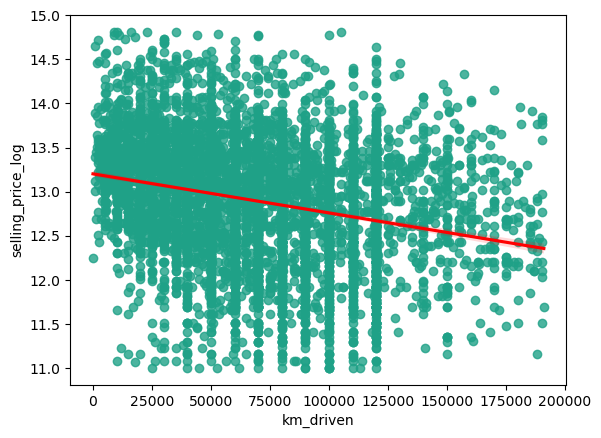

In [31]:
# Create a scatter plot with a regression line
sns.regplot(data=data, x='km_driven', y='selling_price_log', line_kws={"color": "red"}, color=custom_color )

# Display the plot
plt.show()

The code above visually explores the potential linear relationship between the 'km_driven' and 'selling_price_log' columns. 

The red regression line helps indicate the general trend of the relationship and it slopes downwards. 

This suggests a negative correlation between 'km_driven' and 'selling_price'.

In [32]:
# Calculate the Pearson correlation coefficient between 'km_driven' and 'selling_price_log'
data['km_driven'].corr(data['selling_price_log'])

-0.25850176414349013

The correlation coefficient between 'km_driven' and 'selling_price_log' is approximately -0.259.

This negative correlation suggests that there is a weak linear relationship between the log-transformed 'selling_price' ('selling_price_log') and 'km_driven'. 

As 'km_driven' increases, the log-transformed selling price tends to decrease, but the relationship is not very strong based on the magnitude of the correlation coefficient.

### 4.3 Analysing Independent Variable: 'mileage'

In [33]:
# Descriptive statistics for the 'mileage' column
data['mileage'].describe()

count    6405.000000
mean       19.627149
std         3.990083
min         0.000000
25%        17.000000
50%        19.700000
75%        22.540000
max        33.440000
Name: mileage, dtype: float64

The median mileage is 19.7, which is the middle value of the dataset when sorted. The closeness of the mean and median suggests a relatively symmetric distribution.

A higher standard deviation suggests greater variability in mileage within the dataset.

The presence of a minimum value of 0 might indicate missing or invalid data, or it could represent a specific category (e.g., electric cars with no fuel consumption).

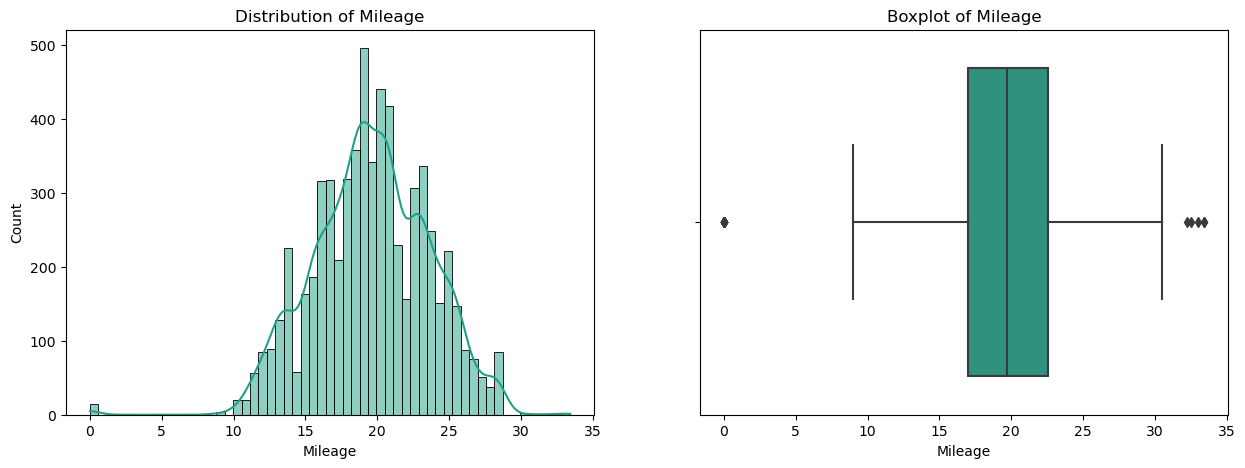

In [34]:
# Set the size of the figure for better visualization
plt.figure(figsize=(15, 5))

# Subplot 1: Histogram of 'mileage' with KDE (Kernel Density Estimate)
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='mileage', kde=True, color=custom_color)
plt.title('Distribution of Mileage')
plt.xlabel('Mileage')

# Subplot 2: Boxplot of 'mileage'
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='mileage', color=custom_color)
plt.title('Boxplot of Mileage')
plt.xlabel('Mileage')

# Display the plots
plt.show()

The histogram provides insights into the frequency distribution of mileage values, while the boxplot provides information about central tendency, spread, and the presence of potential outliers.

In [35]:
# Sort the DataFrame based on the 'mileage' column in ascending order
data.sort_values(by=['mileage'], ascending=True)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,selling_price_log
5733,Mahindra,2020,679000,5000,Diesel,Individual,Manual,First Owner,0.00,2523.0,70.00,200.0,2.0,13.428378
758,Hyundai,2009,120000,90000,Petrol,Individual,Manual,Second Owner,0.00,1086.0,62.00,96.1,5.0,11.695255
6636,Hyundai,2011,150000,40000,Petrol,Individual,Manual,Fourth & Above Owner,0.00,1086.0,62.00,96.1,5.0,11.918397
6446,Mahindra,2019,722000,80000,Diesel,Individual,Manual,First Owner,0.00,2523.0,70.00,200.0,2.0,13.489782
2637,Hyundai,2013,184000,15000,Petrol,Individual,Manual,First Owner,0.00,1086.0,62.10,96.1,5.0,12.122696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,Maruti,2019,430000,20000,CNG,Individual,Manual,First Owner,32.26,998.0,58.30,78.0,4.0,12.971543
2239,Maruti,2013,270000,80000,CNG,Individual,Manual,Second Owner,32.52,998.0,58.33,78.0,5.0,12.506181
5650,Maruti,2020,370000,16000,CNG,Individual,Manual,First Owner,33.00,796.0,47.30,69.0,5.0,12.821261
3790,Maruti,2017,260000,67000,CNG,Individual,Manual,First Owner,33.44,796.0,40.30,60.0,4.0,12.468441


It can be observed that there are extreme values in the 'mileage' variabe, particularly rows with a 'mileage' value of 0.

### Outliers Handling 

In [36]:
# Select rows where 'mileage' is equal to 0 and count the occurrences of each unique value
data['mileage'][data['mileage'] == 0].value_counts()

0.0    14
Name: mileage, dtype: int64

This output indicates that there are 14 occurrences of the value 0.0 in the 'mileage' column.

In [37]:
# Drop rows where 'mileage' is greater than or equal to 42
data = data.drop(data[data['mileage'] >= 42].index).reset_index(drop=True)

# Replace zero values in 'mileage' with the median of non-zero mileage values
data["mileage"] = np.where(data["mileage"] == 0, np.median(data['mileage']), data['mileage'])

The above code removes rows with unusually high mileage values, possibly indicating data errors or outliers.

Then it replaces zero mileage values with the median of non-zero mileage values, providing a more realistic representation of the data.

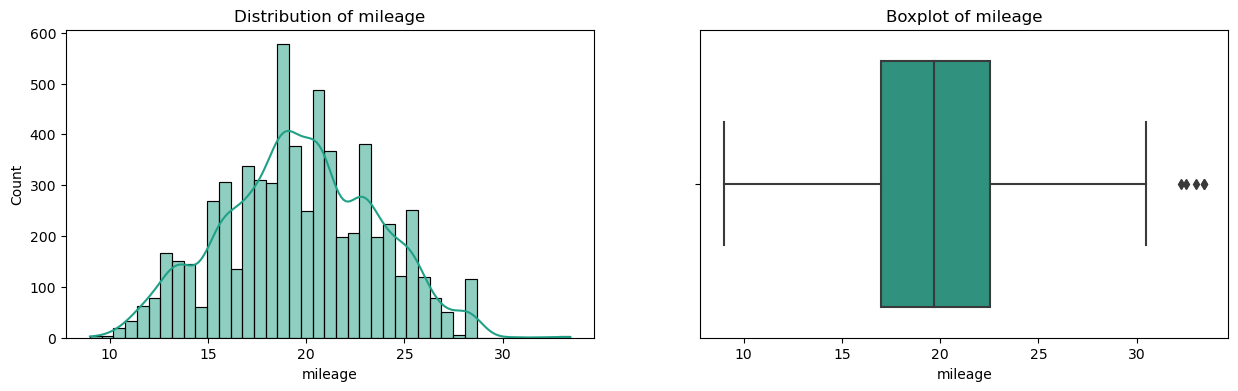

In [38]:
# Set the size of the figure for better visualization
plt.figure(figsize=(15, 4))

# Subplot 1: Histogram of 'km_driven' with KDE (Kernel Density Estimate)
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='mileage', kde=True, color=custom_color )
plt.title('Distribution of mileage')
plt.xlabel('mileage')

# Subplot 2: Boxplot of 'km_driven'
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='mileage', color=custom_color)
plt.title('Boxplot of mileage')
plt.xlabel('mileage')

# Display the plots
plt.show()

The above plots provide a visual comparison of how outlier removal have affected the distribution of the 'mileage' variable.

### Analysing Relationship : 'selling_price' vs 'mileage'

<Axes: xlabel='mileage', ylabel='selling_price_log'>

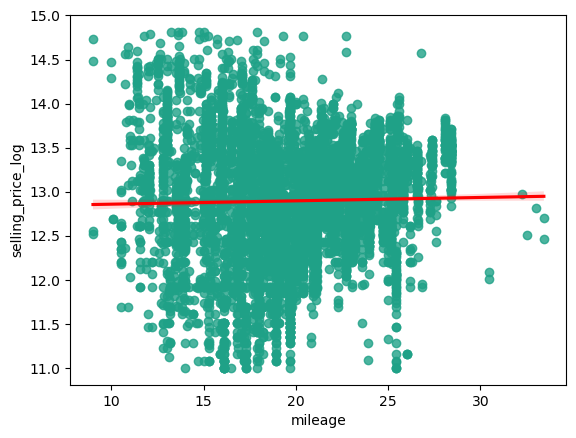

In [39]:
# Create a scatter plot with a regression line
sns.regplot(x='mileage', y=(data['selling_price_log']), data=data, line_kws={'color': 'red'}, color=custom_color)

The above code visually explores the potential linear relationship between 'mileage' and the log-transformed 'selling_price' using a scatter plot with a regression line.

The red regression line indicates that there is a very weak relationship between 'mileage' and 'selling_price'.

In [40]:
# Calculate the Pearson correlation coefficient between 'mileage' and 'selling_price_log'
data['mileage'].corr(data['selling_price_log'])

0.02175659254623797

The correlation coefficient between 'mileage' and 'selling_price_log' is approximately 0.0217. 

This value is close to zero, suggesting a very weak positive correlation between these two variables. 

In other words, there is little to no linear relationship between the mileage and the logarithmically transformed selling price.

### 4.4 Analysing Independent Variable : 'engine'

In [41]:
# Descriptive statistics for the 'engine' column
data['engine'].describe()

count    6405.000000
mean     1412.986885
std       471.192483
min       624.000000
25%      1197.000000
50%      1248.000000
75%      1498.000000
max      3498.000000
Name: engine, dtype: float64

The mean engine capacity is approximately 1413, indicating that, on average, the engine capacity across the dataset is around 1413 cubic centimeters.

The median engine capacity is 1248, which is the middle value of the dataset when sorted. This is less than the mean, suggesting a right-skewed distribution, as the mean is pulled to the right by higher values.

A higher standard deviation suggests greater variability in engine capacities within the dataset.

The distribution of engine capacities appears to be right-skewed because the mean is greater than the median. This suggests that there might be a few vehicles with significantly larger engine capacities, pulling the mean to the right.

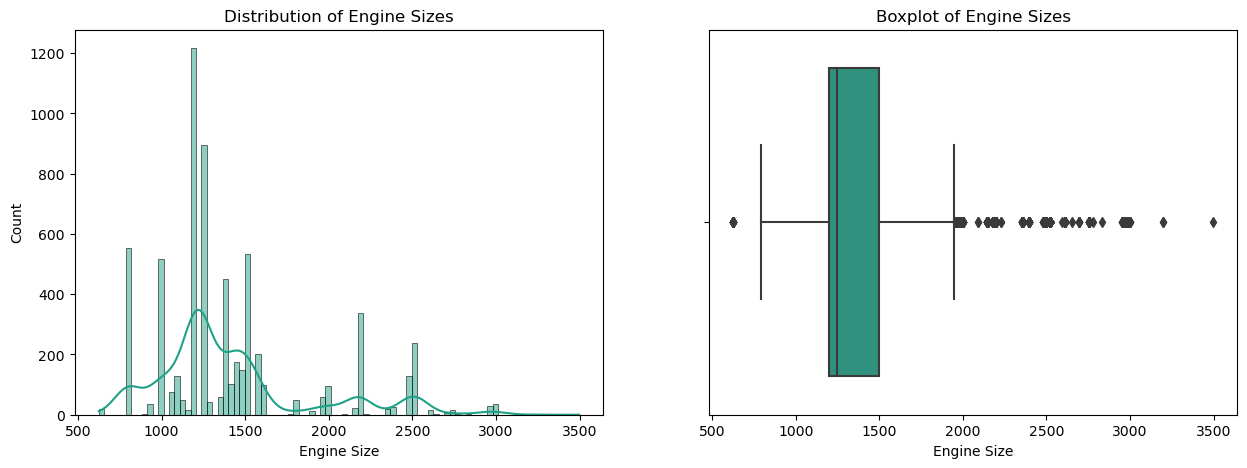

In [42]:
# Set the size of the figure for better visualization
plt.figure(figsize=(15, 5))

# Subplot 1: Histogram of 'engine' with KDE
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='engine', kde=True, color=custom_color)
plt.title('Distribution of Engine Sizes')
plt.xlabel('Engine Size')

# Subplot 2: Boxplot of 'engine'
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='engine', color=custom_color)
plt.title('Boxplot of Engine Sizes')
plt.xlabel('Engine Size')

# Display the plots
plt.show()

The histogram provides insights into the frequency distribution of engine sizes, while the boxplot summarizes key statistics, such as the median, quartiles, and potential outliers.

### Outliers Handling 

In [43]:
# Apply the function to remove outliers from the 'engine' column in the 'data' DataFrame
data = remove_outliers_iqr(data, 'engine')

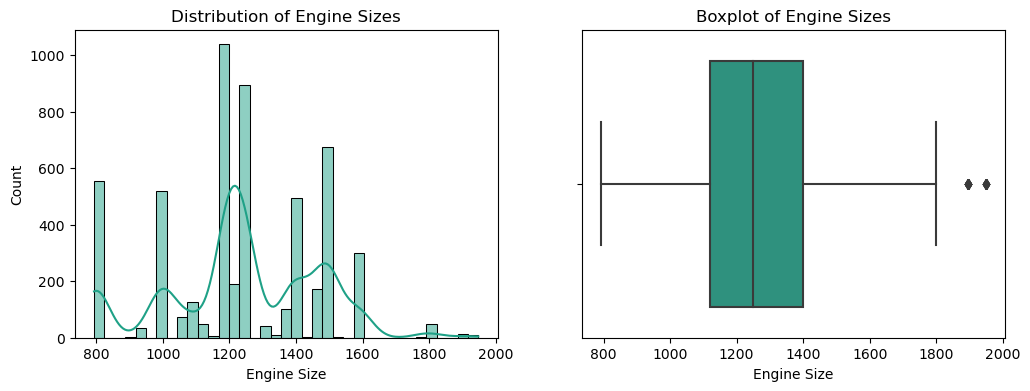

In [44]:
# Set the size of the figure for better visualization
plt.figure(figsize=(12, 4))

# Subplot 1: Histogram of 'engine' with KDE
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='engine', kde=True, color=custom_color)
plt.title('Distribution of Engine Sizes')
plt.xlabel('Engine Size')

# Subplot 2: Boxplot of 'engine'
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='engine', color=custom_color)
plt.title('Boxplot of Engine Sizes')
plt.xlabel('Engine Size')

# Display the plots
plt.show()


The above plots provide a visual comparison of how outlier removal have affected the distribution of the 'engine' variable.

### Analysing Relationship : 'selling_price' vs 'engine'

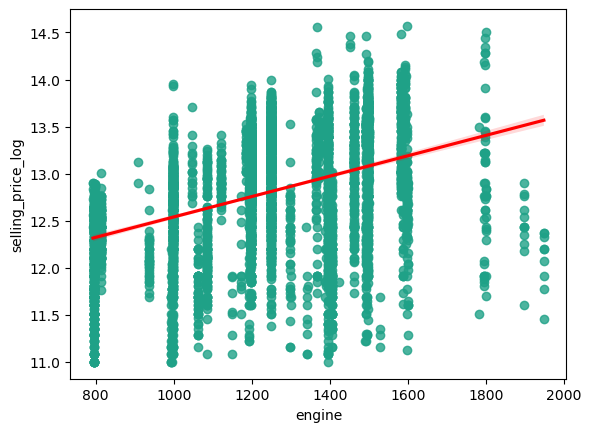

In [45]:
# Create a scatter plot with a regression line
sns.regplot(data=data, x='engine', y='selling_price_log', line_kws={'color': 'red'}, color=custom_color)
plt.show()

The above code visually explores the potential linear relationship between the 'engine' and 'selling_price_log' columns.

The red regression line slopes upwards and this suggests a positive correlation between 'engine' and 'selling_price'.

In [46]:
# Calculate the Pearson correlation coefficient between 'engine' and 'selling_price_log'
data['engine'].corr(data['selling_price_log'])

0.3925307930738157

In this case, the correlation coefficient is approximately 0.3925, suggesting a positive but moderate linear correlation between 'engine' and 'selling_price_log'.

### 4.5 Analysing Independent Variable : 'max_power'

In [47]:
# Descriptive statistics for the 'max_power' column
data['max_power'].describe()

count    5365.000000
mean       80.035572
std        19.805600
min        32.800000
25%        67.100000
50%        78.900000
75%        88.730000
max       189.300000
Name: max_power, dtype: float64

The median maximum power is 78.9, which is the middle value of the dataset when sorted. The closeness of the mean and median suggests a relatively symmetric distribution.

A higher standard deviation suggests greater variability in maximum power within the dataset.

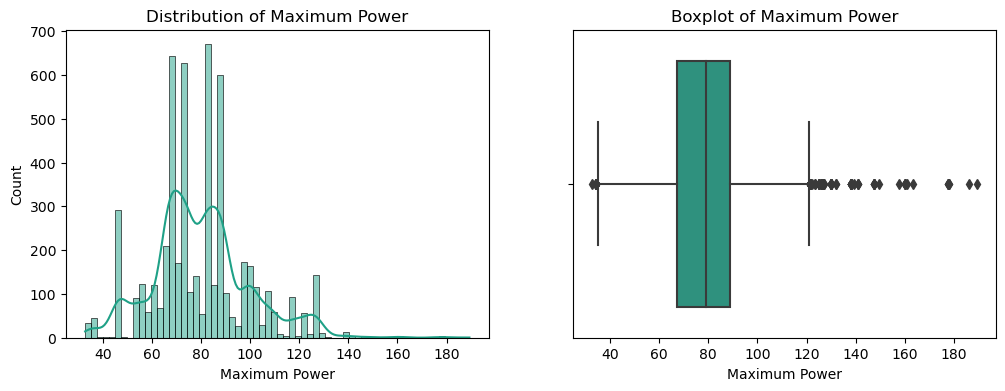

In [48]:
# Set the size of the figure for better visualization
plt.figure(figsize=(12, 4))

# Subplot 1: Histogram of 'max_power' with KDE
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='max_power', kde=True, color=custom_color)
plt.title('Distribution of Maximum Power')
plt.xlabel('Maximum Power')

# Subplot 2: Boxplot of 'max_power'
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='max_power', color=custom_color)
plt.title('Boxplot of Maximum Power')
plt.xlabel('Maximum Power')

# Display the plots
plt.show()

The histogram provides insights into the frequency distribution of maximum power, while the boxplot summarizes key statistics, such as the median, quartiles, and potential outliers.

### Outliers Handling

In [49]:
# Calculate quartiles and interquartile range (IQR)
Q1 = data['max_power'].quantile(0.25)
Q3 = data['max_power'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper limits for potential outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Print the calculated limits
print('Lower Limit:', lower_limit)
print('Upper Limit:', upper_limit)

Lower Limit: 34.65499999999998
Upper Limit: 121.17500000000001


The above code identifies potential outliers in the 'max_power' column by defining a range within which values are considered typical. Values outside this range are considered potential outliers.

In [50]:
# Count the number of data points above the upper limit
data[data['max_power'] > upper_limit]['max_power'].count()

246

In [51]:
# Apply the function to remove outliers from the 'max_power' column in the 'data' DataFrame
data = remove_outliers_iqr(data, 'max_power')

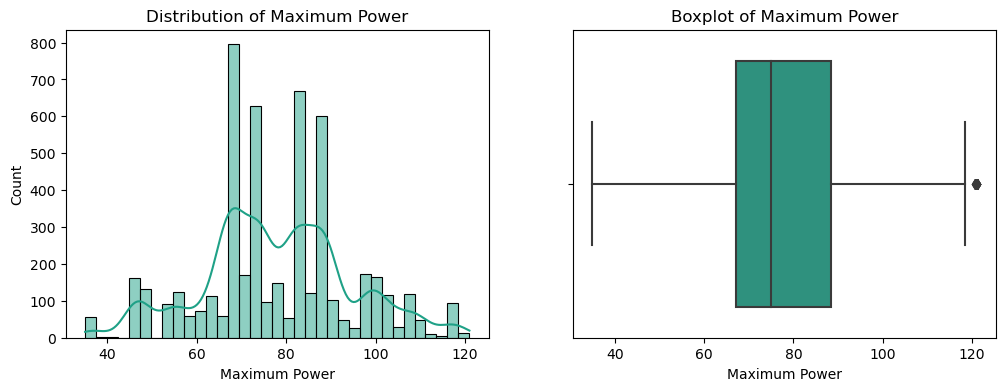

In [52]:
# Set the size of the figure for better visualization
plt.figure(figsize=(12, 4))

# Subplot 1: Histogram of 'max_power' with KDE
plt.subplot(1, 2, 1)
sns.histplot(data=data, x='max_power', kde=True, color=custom_color)
plt.title('Distribution of Maximum Power')
plt.xlabel('Maximum Power')

# Subplot 2: Boxplot of 'max_power'
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='max_power', color=custom_color)
plt.title('Boxplot of Maximum Power')
plt.xlabel('Maximum Power')

# Display the plots
plt.show()

The above plots provide a visual comparison of how outlier removal have affected the distribution of the 'max_power' variable.

### Analysing Relationship : 'selling_price' vs 'max_power'

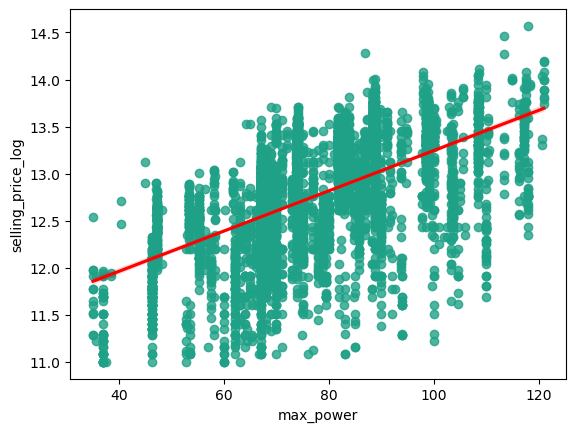

In [53]:
# Scatter plot with regression line
sns.regplot(data=data, x='max_power', y='selling_price_log', line_kws={'color': 'red'}, color=custom_color)
plt.show()

The above code visually explores the potential linear relationship between the 'max_power' and 'selling_price_log' columns.

The red regression line slopes upwards and this suggests a positive correlation between 'max_power' and 'selling_price'.

In [54]:
# Calculate the Pearson correlation coefficient between 'max_power' and 'selling_price_log'
data['max_power'].corr(data['selling_price_log'])

0.5731980977582772

The correlation coefficient of 0.5688 suggests a moderate positive linear correlation between 'max_power' and 'selling_price_log'.

The positive value indicates that as 'max_power' increases, 'selling_price_log' tends to increase as well. 

The strength of the correlation is moderate, as the coefficient is not close to 1 but is still significantly positive.

### 4.6 Analysing Independent Variable : 'torque'

In [55]:
# Descriptive statistics for the 'torque' column
data['torque'].describe()

count    5098.000000
mean      143.854847
std        55.831184
min        55.917000
25%       100.000000
50%       130.000000
75%       190.000000
max       789.000000
Name: torque, dtype: float64

The difference between the mean and median suggests a right-skewed distribution, where a few high torque values are pulling the mean to the right.

A higher standard deviation suggests greater variability in torque within the dataset.

The presence of a maximum value much larger than the 75th percentile suggests potential outliers or a right-skewed distribution.

### 4.7 Analysing Independent Variable : 'seats'

In [56]:
# Descriptive statistics for the 'seats' column
data['seats'].describe()

count    5098.000000
mean        5.143782
std         0.574388
min         4.000000
25%         5.000000
50%         5.000000
75%         5.000000
max        14.000000
Name: seats, dtype: float64

The median number of seats is 5, which is the middle value of the dataset when sorted. The mean and median are close, suggesting a relatively symmetric distribution.

A lower standard deviation suggests less variability in the number of seats within the dataset.

he presence of a maximum value much larger than the 75th percentile suggests potential outliers or extreme values that may need further investigation, particularly if such high values are unexpected in the context of the data 

### 4.8 Correlation Analysis Between Numerical Values 

<Axes: >

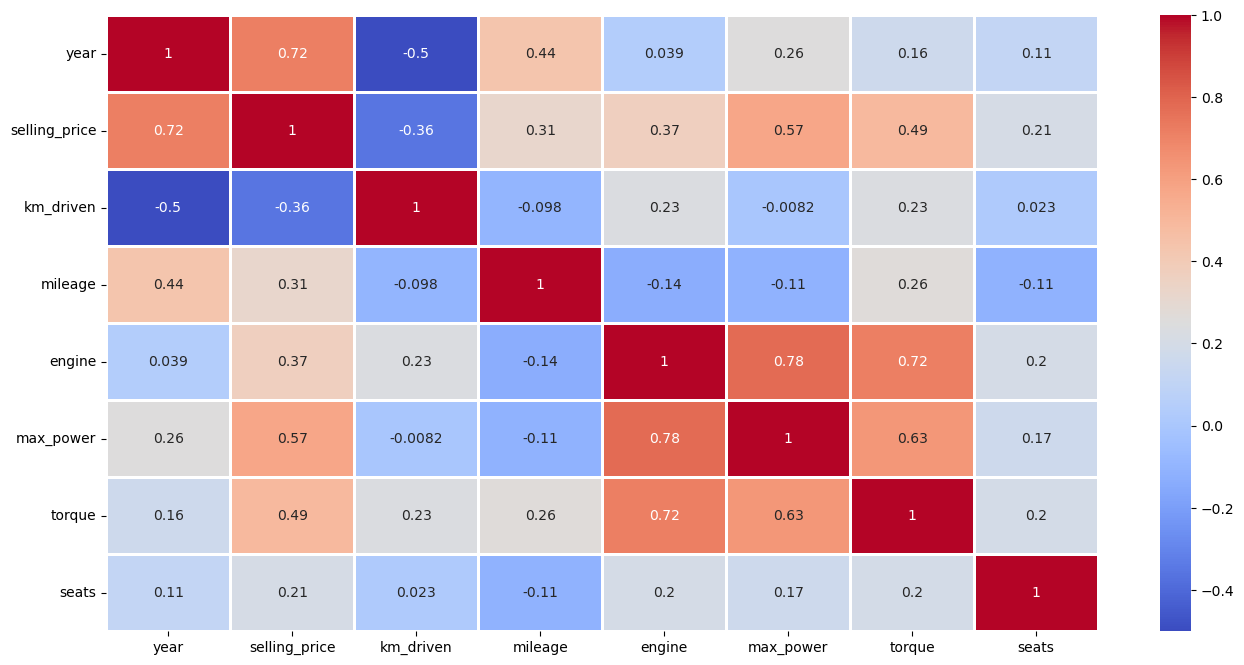

In [57]:
plt.figure(figsize=(16, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(data[num_cols].corr(), annot=True, linewidths=2, cmap='coolwarm')


It can be observed from the above heatmap that there is a high correalation between the 'torque' and 'max_power'. Hence, we will drop the 'torque' variable from the dataset.

Additionally, we will also drop the 'seats' variable due to its weak correalation with other numerical variables.

In [58]:
data = data.drop(['mileage','torque', 'seats'], axis=1)

### Categorical Data Analysis

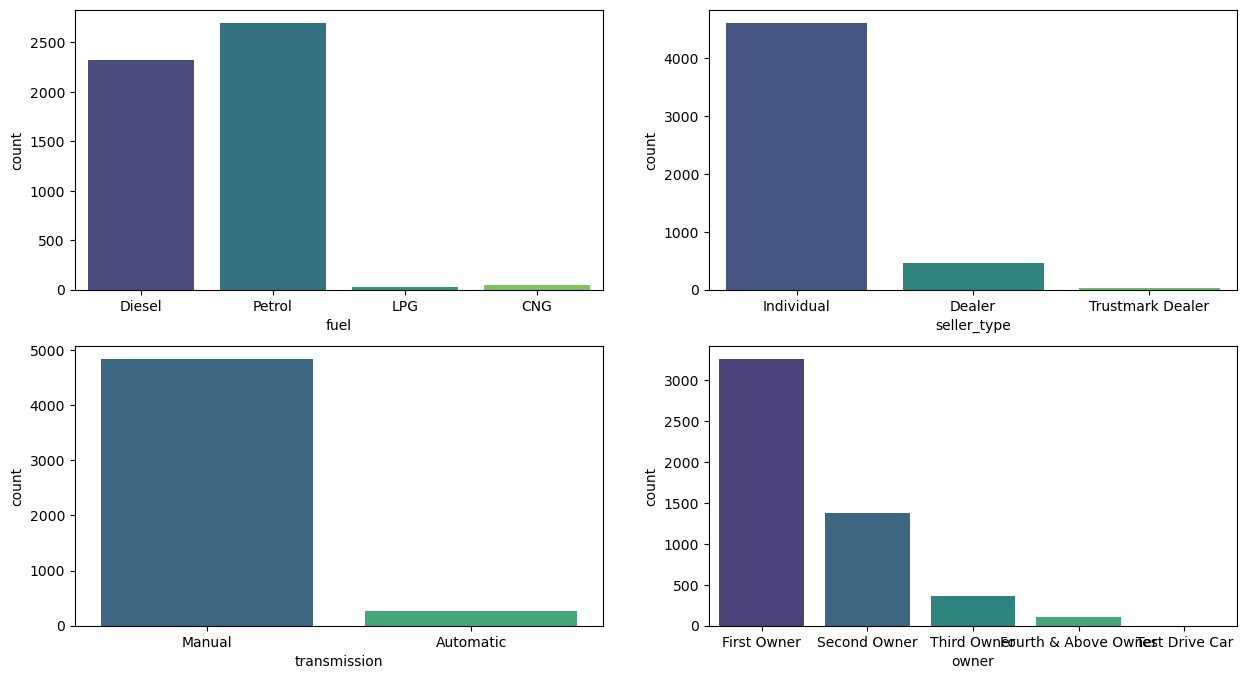

In [59]:
# Remove 'name' from the list of categorical columns
obj_cols.remove('name')

# Create a figure with a specified size
fig = plt.figure(figsize=[15, 8])

# Loop through each categorical column and create a countplot
for col in range(len(obj_cols)):
    plt.subplot(2, 2, col + 1)
    
    # Use Seaborn's countplot to visualize the count distribution
    sns.countplot(x=obj_cols[col], data=data, palette='viridis')
    
# Show the plots
plt.show()

The above code provides a visual representation of the count distribution for each categorical column in the dataset.

Each subplot represents a different categorical column, and the countplot shows the number of occurrences of each category.

###  4.9 Analysing Independent Variable : 'seller_type'

In [60]:
# Descriptive statistics for the 'seller_type' column
data['seller_type'].describe()

count           5098
unique             3
top       Individual
freq            4609
Name: seller_type, dtype: object

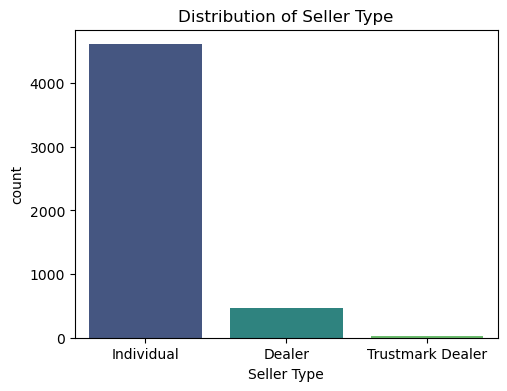

In [61]:
# Set the size of the figure for better visualization
plt.figure(figsize=(12, 4))

# Subplot 1: Countplot of 'seller_type'
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='seller_type', palette='viridis')
plt.title('Distribution of Seller Type')
plt.xlabel('Seller Type')

# Display the plots
plt.show()

There are 3 unique values in the 'seller_type' column. 

The most frequently occurring value in the 'seller_type' column is 'Individual'. 

This indicates that the majority of sellers in the dataset are individuals.

### Analysing Relationship : 'selling_price' vs 'seller_type'

In [62]:
# Group by 'seller_type' and calculate the mean of 'selling_price_log' for each group
seller_type_vs_selling_price = data.groupby('seller_type')['selling_price_log'].mean().reset_index()

In [63]:
# Rename the columns of the DataFrame
seller_type_vs_selling_price.columns = ['seller_type', 'avg_selling_price']

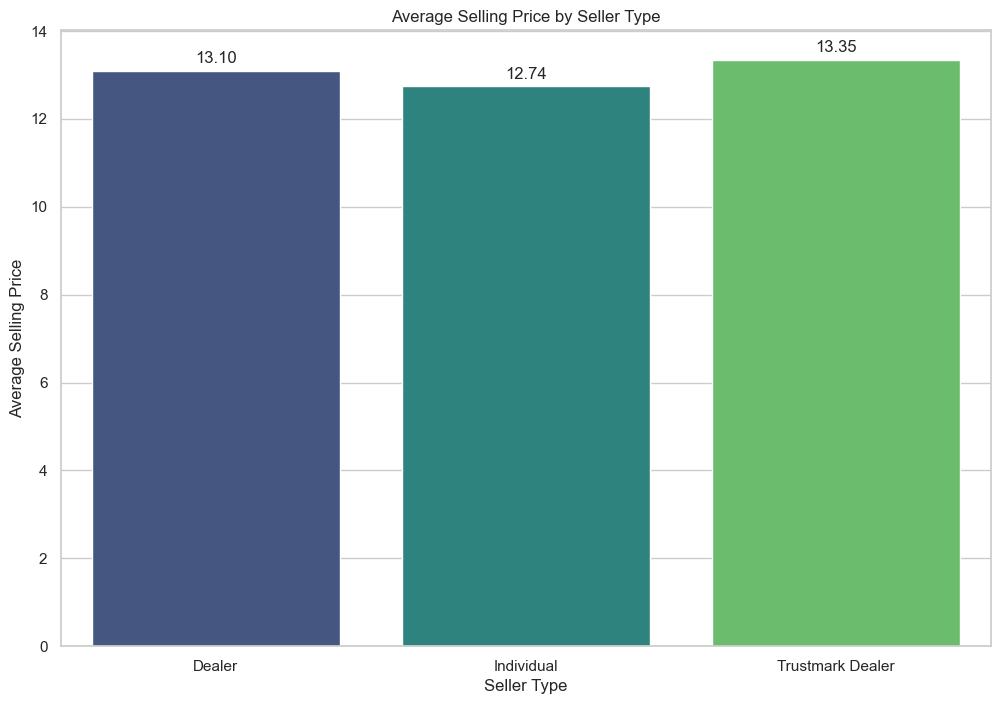

In [64]:
# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='seller_type', y='avg_selling_price', data=seller_type_vs_selling_price, palette='viridis')

# Annotate each bar with its respective value
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 9), 
                     textcoords='offset points')

# Set title and axis labels
plt.title('Average Selling Price by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')

# Show the plot
plt.show()

Using the above code we can visually compare the average selling prices for different seller types using a bar plot.

it appears that 'Trustmark Dealer' has the highest average selling price, followed by 'Dealer' and then 'Individual'.

### 4.10 Analysing Independent Variable : 'fuel'

In [65]:
# Descriptive statistics for the 'fuel' column
data['fuel'].describe()

count       5098
unique         4
top       Petrol
freq        2694
Name: fuel, dtype: object

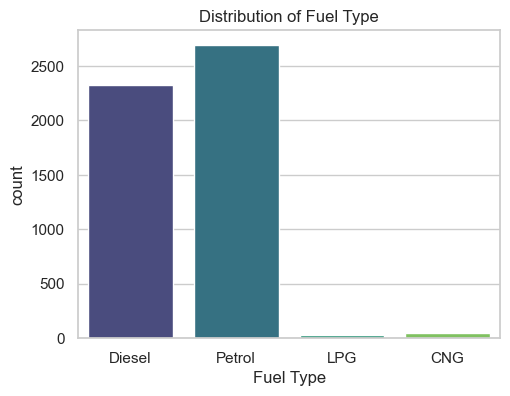

In [66]:
# Set the size of the figure for better visualization
plt.figure(figsize=(12, 4))

# Subplot 1: Countplot of 'fuel'
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='fuel', palette='viridis')
plt.title('Distribution of Fuel Type')
plt.xlabel('Fuel Type')

# Display the plots
plt.show()

There are 4 unique values in the 'fuel' column. This suggests that there are four distinct categories or types of fuel used by the vehicles in the dataset.

The most frequently occurring value in the 'fuel' column is "Petrol." This indicates that the majority of vehicles in the dataset use petrol as their fuel type.

### Analysing Relationship : 'selling_price' vs 'fuel'

In [67]:
# Group by 'fuel' and calculate the mean of 'selling_price_log' for each group
fuel_type_vs_selling_price = data.groupby('fuel')['selling_price_log'].mean().reset_index()

# Rename the columns of the DataFrame
fuel_type_vs_selling_price.columns = ['fuel', 'avg_selling_price']

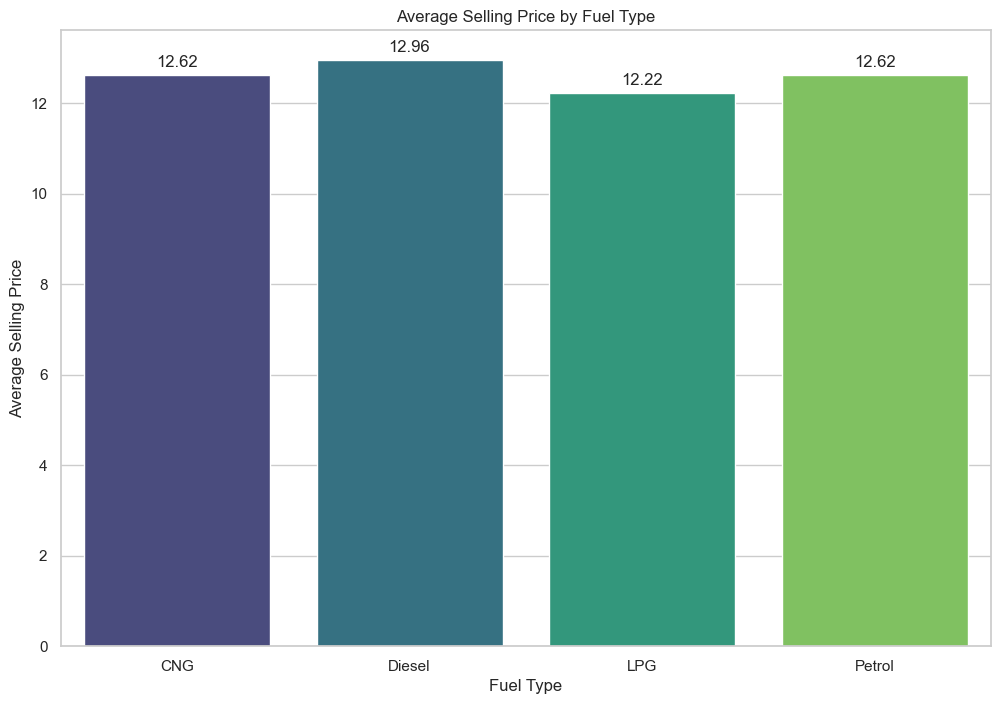

In [68]:
# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='fuel', y='avg_selling_price', data=fuel_type_vs_selling_price, palette='viridis')

# Annotate each bar with its respective value
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 9), 
                     textcoords='offset points')

# Set title and axis labels
plt.title('Average Selling Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Selling Price')

# Show the plot
plt.show()


Each row in the table represents a different fuel type, and the corresponding column 'avg_selling_price' provides the average selling price for vehicles using that type of fuel.

It appears that vehicles using diesel have the highest average selling price, followed by CNG, petrol, and then LPG.

### 4.11 Analysing Independent Variable : 'transmission'

In [69]:
# Descriptive statistics for the 'transmission' column
data['transmission'].describe()

count       5098
unique         2
top       Manual
freq        4838
Name: transmission, dtype: object

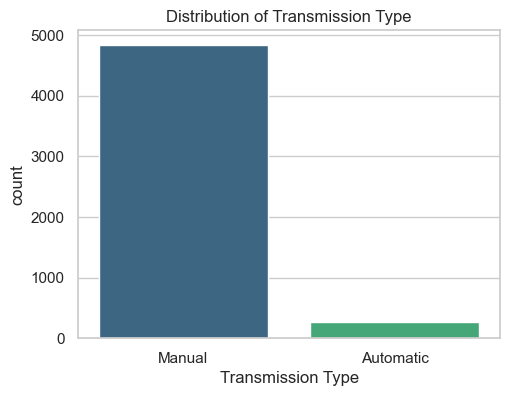

In [70]:
# Set the size of the figure for better visualization
plt.figure(figsize=(12, 4))

# Subplot 1: Countplot of 'transmission'
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='transmission', palette='viridis')
plt.title('Distribution of Transmission Type')
plt.xlabel('Transmission Type')

# Display the plots
plt.show()

There are 2 unique values in the 'transmission' column. This suggests that there are two distinct categories or types of transmissions in the dataset.

The most frequently occurring value in the 'transmission' column is "Manual." This indicates that the majority of vehicles in the dataset have a manual transmission.

### Analysing Relationship : 'selling_price' vs 'transmission'

In [71]:
# Group by 'transmission' and calculate the mean of 'selling_price_log' for each group
transmission_type_vs_selling_price = data.groupby('transmission')['selling_price_log'].mean().reset_index()

# Rename the columns of the DataFrame
transmission_type_vs_selling_price.columns = ['transmission', 'avg_selling_price']

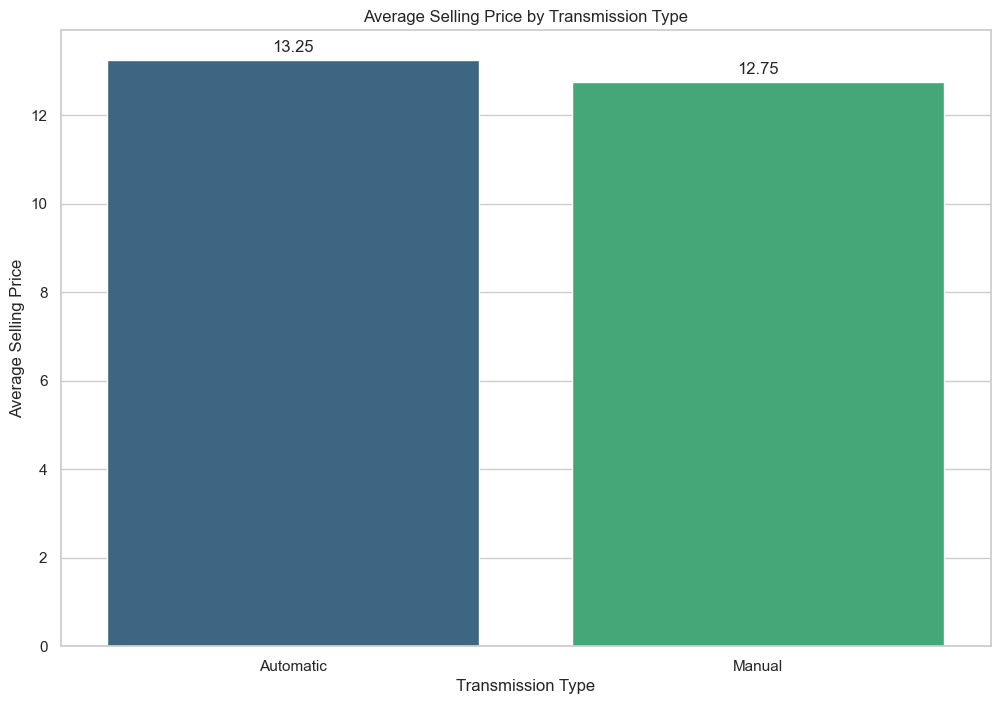

In [72]:
# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='transmission', y='avg_selling_price', data=transmission_type_vs_selling_price, palette='viridis')

# Annotate each bar with its respective value
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 9), 
                     textcoords='offset points')

# Set title and axis labels
plt.title('Average Selling Price by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Average Selling Price')

# Show the plot
plt.show()


It can be observed that 'utomatic'Vehicles have the highest average selling price, compared to 'Manual' transmission types.

### 4.12 Encoding Categorical Variables 

In [73]:
data.select_dtypes(include = 'object').columns.to_list()

['name', 'fuel', 'seller_type', 'transmission', 'owner']

In [74]:
le = LabelEncoder()

In [75]:
data['name'] = le.fit_transform(data['name'])
data['seller_type'] = le.fit_transform(data['seller_type'])
data['fuel'] = le.fit_transform(data['fuel'])
data['transmission'] = le.fit_transform(data['transmission'])
data['owner'] = le.fit_transform(data['owner'])

In [76]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,selling_price_log
0,10,2014,450000,145500,1,1,1,0,1248.0,74.00,13.017005
1,15,2014,370000,120000,1,1,1,2,1498.0,103.52,12.821261
2,6,2006,158000,140000,3,1,1,4,1497.0,78.00,11.970357
3,7,2010,225000,127000,1,1,1,0,1396.0,90.00,12.323860
4,10,2007,130000,120000,3,1,1,0,1298.0,88.20,11.775297


The categorical variables in the dataset, including 'name,' 'seller_type,' 'fuel,' 'transmission,' and 'owner,' were encoded using the LabelEncoder from scikit-learn.

### 5. Linear Regression Model

### 5.1 Data Splitting and Scaling 

The dataset is split into training and testing sets for model development and evaluation.

In [77]:
x = data.drop(labels = 'selling_price_log', axis =1)
y = data['selling_price_log']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

print(x_train.shape)
print(x_test.shape)

(4078, 10)
(1020, 10)


In [78]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Assuming x_train contains both numeric and non-numeric columns
# You should modify this based on your actual column types
num_cols = x_train.select_dtypes(include=['float64', 'int64']).columns
obj_cols = x_train.select_dtypes(include=['object']).columns

# Create transformers for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, obj_cols)
    ])

# Apply the column transformer to the training and testing data
x_train_scaled = preprocessor.fit_transform(x_train)
x_test_scaled = preprocessor.transform(x_test)

### 5.2 Model Training and Model Evaluation

In [79]:
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(x_train_scaled, y_train)

# Fit the model to the training data
model.fit(x_train_scaled, y_train)

# List the coefficients
coefficients = model.coef_

# Print the coefficients one after another
print("Coefficients:")
for i, coef in enumerate(coefficients):
    print(f'  Coefficient {i+1}: {coef}')

# Print the intercept
print('\nIntercept: {:.4f}'.format(model.intercept_))

# Evaluate the model on the training set
train_r2 = model.score(x_train_scaled, y_train)
print('\nR-squared (Training): {:.4f}'.format(train_r2))

# Evaluate the model on the testing set
test_r2 = model.score(x_test_scaled, y_test)
print('R-squared (Testing): {:.4f}'.format(test_r2))


Coefficients:
  Coefficient 1: 0.19982845005861324
  Coefficient 2: 0.4040849663702034
  Coefficient 3: 0.020503137245849207
  Coefficient 4: 0.019519661667534043
  Coefficient 5: 0.055955418892857434

Intercept: 12.7675

R-squared (Training): 0.9254
R-squared (Testing): 0.9290


In [80]:
y_pred = model.predict(x_test_scaled)

MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

MAE=mean_absolute_error(10**(y_test), 10**(y_pred))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 1.2626376474561625e+27
MAE : 6290629334960.838
RMSE : 35533612924330.71


### 5.3 Cross-Validation

In [81]:
# Create and train the Linear Regression model
model = LinearRegression()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, x_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative mean squared error to positive (for clarity)
mse_scores = -cv_scores

# Calculate metrics
mean_mse = np.mean(mse_scores)
r2_scores = cross_val_score(model, x_train_scaled, y_train, cv=5, scoring='r2')
mean_r2 = np.mean(r2_scores)

# Fit the model on the training set
model.fit(x_train_scaled, y_train)

# Display results
print("Mean Squared Error (CV):", mean_mse)
print("R-squared (CV):", mean_r2)
print("\nModel Coefficients:")
for feature, coef in zip(x_train.columns, model.coef_):
    print(f"{feature}: {coef:.6f}")
print("\nIntercept:", model.intercept_)
print("\nR-squared (Training):", model.score(x_train_scaled, y_train))
print("R-squared (Testing):", model.score(x_test_scaled, y_test))

Mean Squared Error (CV): 0.028660367927312358
R-squared (CV): 0.9247873795021435

Model Coefficients:
name: 0.199828
year: 0.404085
selling_price: 0.020503
km_driven: 0.019520
fuel: 0.055955

Intercept: 12.767453404960394

R-squared (Training): 0.9253780294124302
R-squared (Testing): 0.92896577438512


In [82]:
y_pred = model.predict(x_test_scaled)

MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

MAE=mean_absolute_error(10**(y_test), 10**(y_pred))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 1.2626376474561625e+27
MAE : 6290629334960.838
RMSE : 35533612924330.71


### 6. Feature Engineering 

### 6.1 Ploynomial Features 

In [83]:
# Create and train the Linear Regression model
model = LinearRegression()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, x_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative mean squared error to positive (for clarity)
mse_scores = -cv_scores

# Calculate metrics
mean_mse = np.mean(mse_scores)
r2_scores = cross_val_score(model, x_train_scaled, y_train, cv=5, scoring='r2')
mean_r2 = np.mean(r2_scores)

# Fit the model on the training set
model.fit(x_train_scaled, y_train)

# Display results
print("Mean Squared Error (CV):", mean_mse)
print("R-squared (CV):", mean_r2)
print("\nModel Coefficients:")
for feature, coef in zip(x_train.columns, model.coef_):
    print(f"{feature}: {coef:.6f}")
print("\nIntercept:", model.intercept_)
print("\nR-squared (Training):", model.score(x_train_scaled, y_train))
print("R-squared (Testing):", model.score(x_test_scaled, y_test))


Mean Squared Error (CV): 0.028660367927312358
R-squared (CV): 0.9247873795021435

Model Coefficients:
name: 0.199828
year: 0.404085
selling_price: 0.020503
km_driven: 0.019520
fuel: 0.055955

Intercept: 12.767453404960394

R-squared (Training): 0.9253780294124302
R-squared (Testing): 0.92896577438512


### Model Training and Evaluation

In [84]:
# Assuming x_train_scaled and x_test_scaled are already scaled

# Step 3: Polynomial Feature Generation
degree = 2  # You can experiment with different degrees
poly_features = PolynomialFeatures(degree=degree, include_bias=False)

x_train_poly = poly_features.fit_transform(x_train_scaled)
x_test_poly = poly_features.transform(x_test_scaled)

# Step 4: Model Training
model = LinearRegression()
model.fit(x_train_poly, y_train)

# Step 5: Model Evaluation
# Evaluate on the training set
train_r2_poly = model.score(x_train_poly, y_train)

# Evaluate on the testing set
test_r2_poly = model.score(x_test_poly, y_test)

# Cross-validation
cv_scores_poly = cross_val_score(model, x_train_poly, y_train, cv=5, scoring='neg_mean_squared_error')
mse_scores_poly = -cv_scores_poly
mean_mse_poly = np.mean(mse_scores_poly)

# Display results
print("\nWith Polynomial Features:")
print("R-squared (Training): {:.4f}".format(train_r2_poly))
print("R-squared (Testing): {:.4f}".format(test_r2_poly))
print("Mean Squared Error (CV): {:.6f}".format(mean_mse_poly))



With Polynomial Features:
R-squared (Training): 0.9850
R-squared (Testing): 0.9845
Mean Squared Error (CV): 0.006101
